## Problem 1

In [151]:
# object type 6 is stars and 3 is galaxies
from astroML.datasets import fetch_imaging_sample
data = fetch_imaging_sample()
objtype = data['type']
stars = data[objtype == 6]
galaxies = data[objtype == 3]
ngal = len(galaxies)

print(f"There are {ngal} galaxies.")

There are 248750 galaxies.


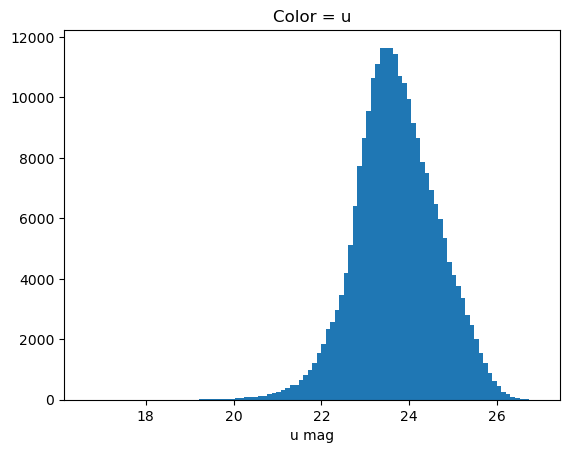

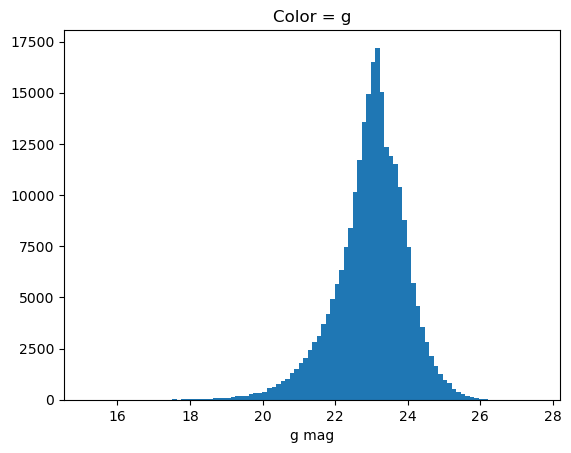

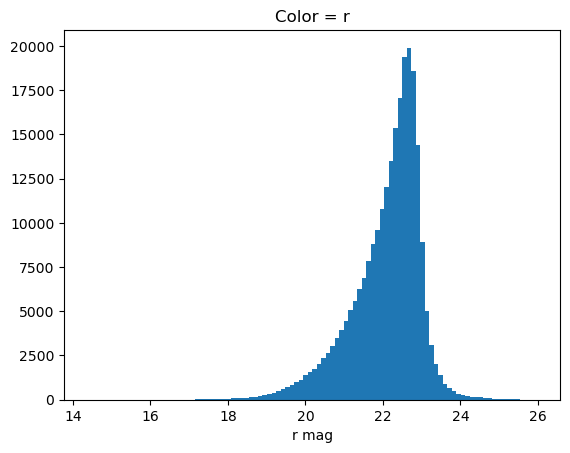

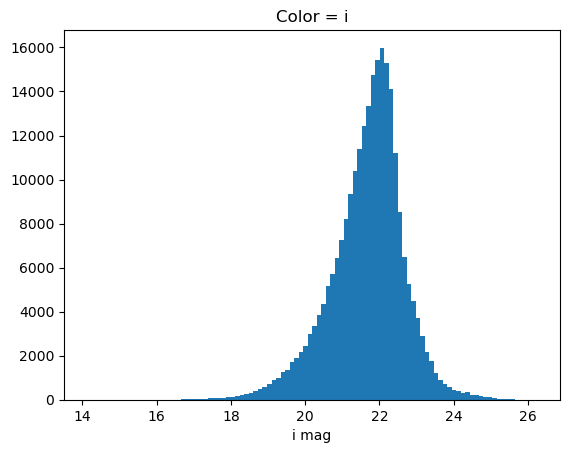

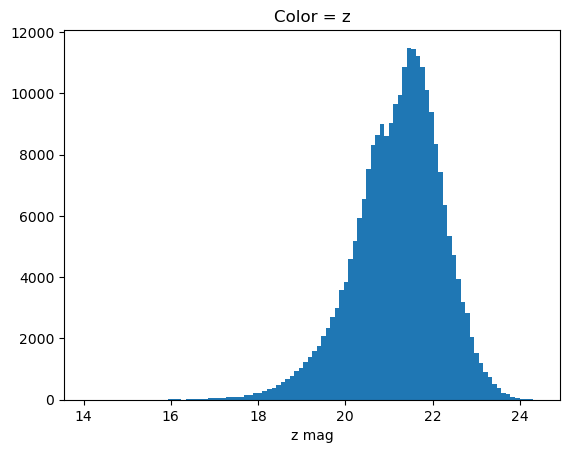

In [ ]:
from matplotlib import pyplot as plt
for color in 'ugriz':
    column = f"{color}RawPSF"
    plt.hist(galaxies[column], bins=100)
    plt.title(f"Color = {color}")
    plt.xlabel(f"{color} mag")
    plt.show()

The r magnitude seems to drop steeply at ~23. The i magnitude similarly drops just after ~22, but it is less obvious of a cutoff than in the r magnitude. The other colors do not seem to have any harsh cutoffs.  

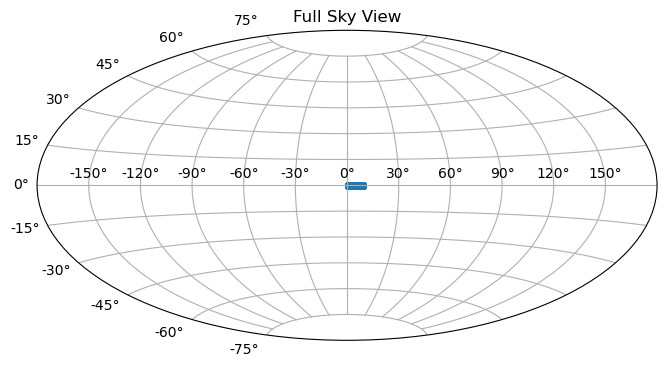

In [34]:
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=galaxies['ra']*u.degree, dec=galaxies['dec']*u.degree, frame='icrs')
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

fig, ax = plt.subplots(figsize=(8, 4.2), subplot_kw=dict(projection="aitoff"))
ax.grid(True)
ax.scatter(ra_rad, dec_rad, marker="o", s=2, alpha=0.3)
fig.subplots_adjust(top=0.95, bottom=0.0)
ax.set_title("Full Sky View")
plt.show()

Text(0.5, 1.0, 'Zoomed In View')

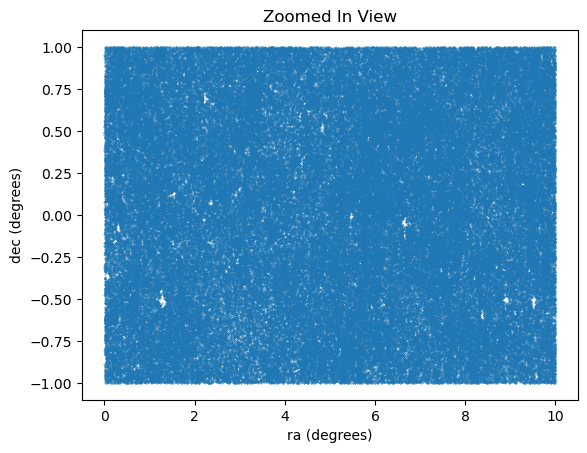

In [35]:
plt.scatter(galaxies['ra'], galaxies['dec'], s=.1)
plt.ylabel("dec (degrees)")
plt.xlabel("ra (degrees)")
plt.title("Zoomed In View")

(array([23085., 24084., 22944., 25256., 24060., 26899., 25457., 26303.,
        25632., 25030.]),
 array([-9.999830e-01, -7.999851e-01, -5.999872e-01, -3.999893e-01,
        -1.999914e-01,  6.500000e-06,  2.000044e-01,  4.000023e-01,
         6.000002e-01,  7.999981e-01,  9.999960e-01]),
 <BarContainer object of 10 artists>)

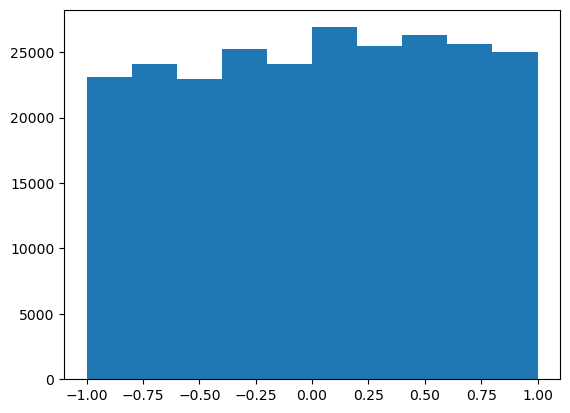

In [23]:
plt.hist(galaxies['dec'])

## Problem 2

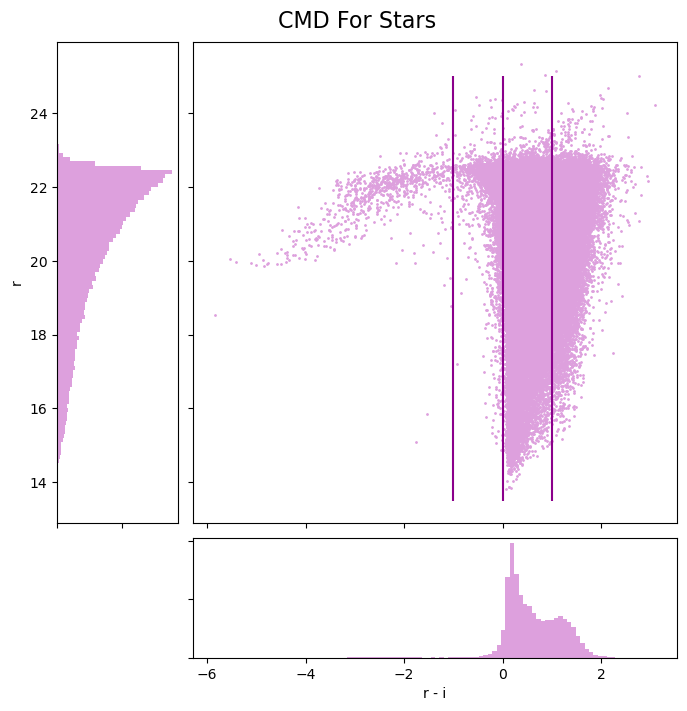

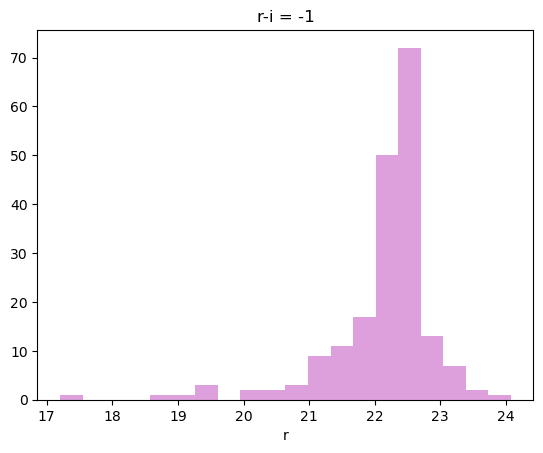

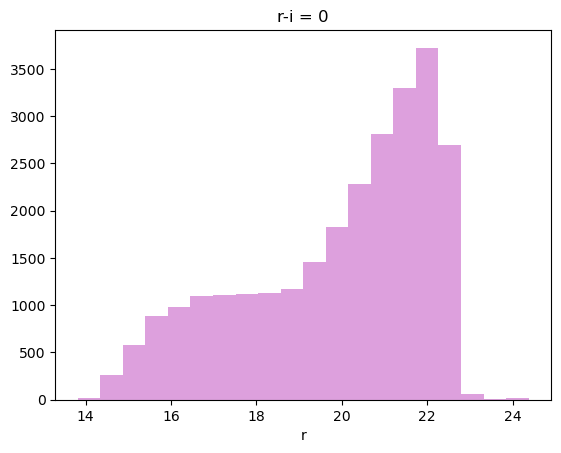

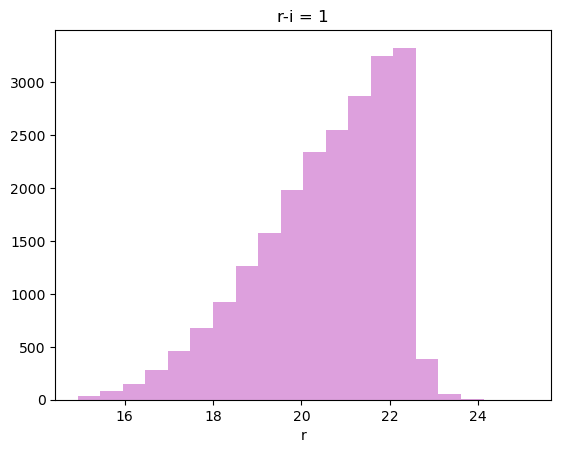

In [121]:
import matplotlib.gridspec as gridspec
import numpy as np

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,4], height_ratios=[4,1],
                       hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs[0, 1])      # top right: main 2D plot (large)
ax_bottom = fig.add_subplot(gs[1, 1], sharex=ax_main)    # bottom right: marginal x (thin)
ax_top = fig.add_subplot(gs[0, 0], sharey=ax_main)       # top left: marginal y (thin)
ax_empty = fig.add_subplot(gs[1, 0])     # bottom left: empty
ax_empty.axis('off')

ax_main.tick_params(labelbottom=False, labelleft=False)
ax_bottom.tick_params(labelleft=False)
ax_top.tick_params(labelbottom=False)

ax_bottom.set_xlabel("r - i")
ax_top.set_ylabel("r")

ax_main.scatter(stars['rRawPSF'] - stars['iRawPSF'], stars['rRawPSF'], s=1, color='plum')
ax_bottom.hist(stars['rRawPSF'] - stars['iRawPSF'],bins=100, color='plum')
ax_top.hist(stars['rRawPSF'], bins=100, orientation='horizontal', color='plum')

ax_main.vlines([-1,0,1],ymin=13.5,ymax=25, color='darkmagenta')

fig.suptitle("CMD For Stars", y=0.92, fontsize=16)

plt.show()

color_data = np.array(stars['rRawPSF'] - stars['iRawPSF'])
mag_data = np.array(stars['rRawPSF'])

low_mask = np.logical_and(-1.3 < color_data, color_data < -.7)
mag_data_low = mag_data[low_mask]

mid_mask = np.logical_and(-.3 < color_data, color_data < .3)
mag_data_mid = mag_data[mid_mask]

high_mask = np.logical_and(.7 < color_data, color_data < 1.3)
mag_data_high = mag_data[high_mask]

titles = ["r-i = -1", "r-i = 0", "r-i = 1"]
for i,data in enumerate([mag_data_low, mag_data_mid, mag_data_high]):
    plt.hist(data, bins=20,color='plum')
    plt.title(titles[i])
    plt.xlabel("r")
    plt.show()

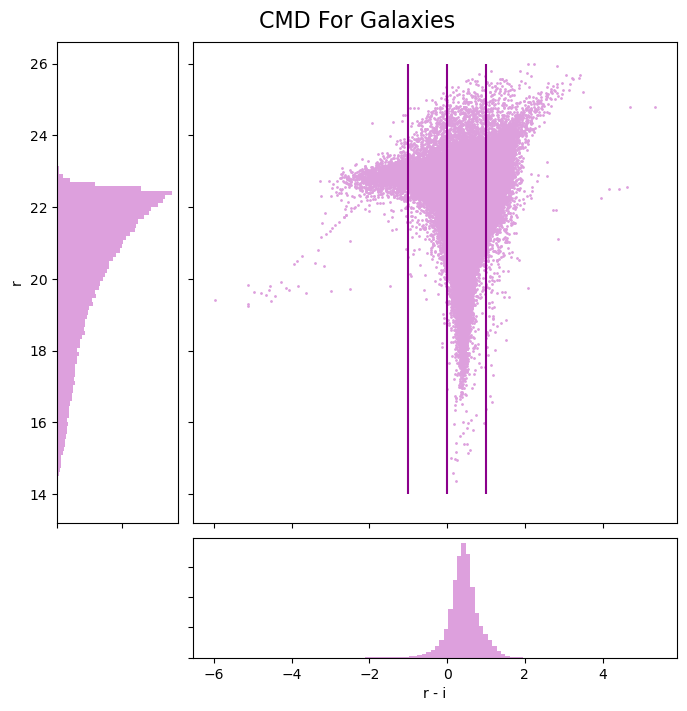

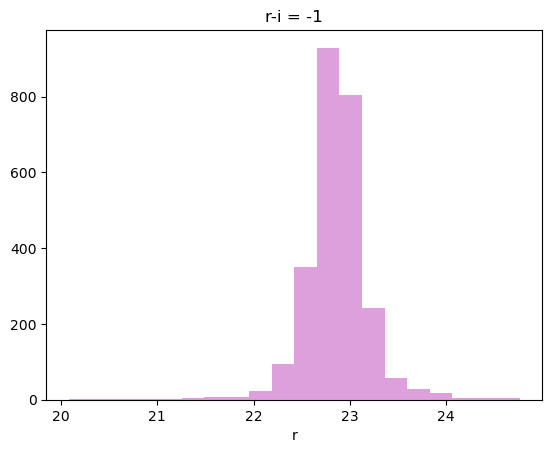

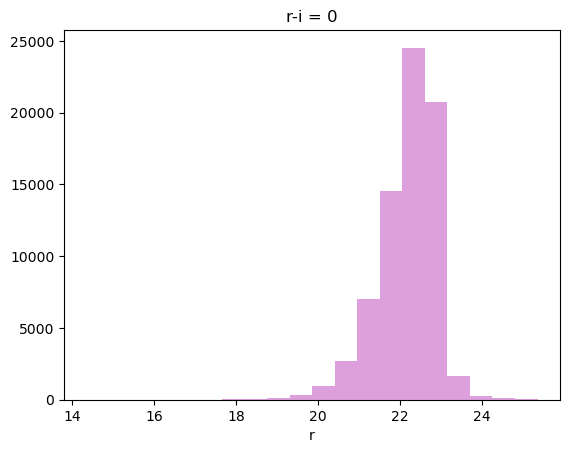

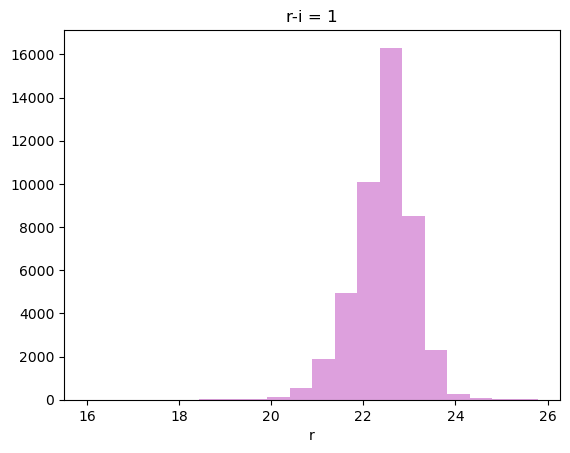

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,4], height_ratios=[4,1],
                       hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs[0, 1])      # top right: main 2D plot (large)
ax_bottom = fig.add_subplot(gs[1, 1], sharex=ax_main)    # bottom right: marginal x (thin)
ax_top = fig.add_subplot(gs[0, 0], sharey=ax_main)       # top left: marginal y (thin)
ax_empty = fig.add_subplot(gs[1, 0])     # bottom left: empty
ax_empty.axis('off')

ax_main.tick_params(labelbottom=False, labelleft=False)
ax_bottom.tick_params(labelleft=False)
ax_top.tick_params(labelbottom=False)

ax_bottom.set_xlabel("r - i")
ax_top.set_ylabel("r")

ax_main.scatter(galaxies['rRawPSF'] - galaxies['iRawPSF'], galaxies['rRawPSF'], s=1, color='plum')
ax_bottom.hist(galaxies['rRawPSF'] - galaxies['iRawPSF'],bins=100,color='plum')
ax_top.hist(stars['rRawPSF'], bins=100, orientation='horizontal',color='plum')

ax_main.vlines([-1,0,1],ymin=14,ymax=26,color='darkmagenta')

fig.suptitle("CMD For Galaxies", y=0.92, fontsize=16)

plt.show()


color_data = np.array(galaxies['rRawPSF'] - galaxies['iRawPSF'])
mag_data = np.array(galaxies['rRawPSF'])

low_mask = np.logical_and(-1.3 < color_data, color_data < -.7)
mag_data_low = mag_data[low_mask]

mid_mask = np.logical_and(-.3 < color_data, color_data < .3)
mag_data_mid = mag_data[mid_mask]

high_mask = np.logical_and(.7 < color_data, color_data < 1.3)
mag_data_high = mag_data[high_mask]

titles = ["r-i = -1", "r-i = 0", "r-i = 1"]
for i,data in enumerate([mag_data_low, mag_data_mid, mag_data_high]):
    plt.hist(data, bins=20, color='plum')
    plt.title(titles[i])
    plt.xlabel("r")
    plt.show()

## Problem 3

In [122]:
from astroML.datasets import fetch_sdss_specgals
data = fetch_sdss_specgals()

In [124]:
z_mask = np.logical_and(.3 < data['z'], data['z'] <.301)
rel_data = data[z_mask]

Text(0.5, 0, '$\\lambda$ ($\\AA$)')

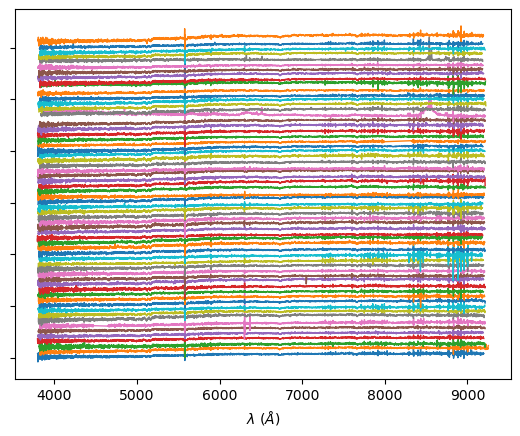

In [140]:
from astroquery.sdss import SDSS
plates = rel_data["plate"]
mjds = rel_data["mjd"]
fibers = rel_data["fiberID"]

offset = 0
for plate, mjd, fiber in zip(plates,mjds,fibers):
    spec_data = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber)[0][1].data
    plt.plot(10**spec_data['loglam'], spec_data['flux'] + offset, linewidth=1)
    offset += 10

plt.tick_params(labelleft=False)
plt.xlabel('$\lambda$ ($\AA$)')

## Problem 4

In [142]:
station_labels = "ABCDEFG"
stations = [[32.4, -80.633],\
            [33.828, -79.122],\
            [29.8, -95.9],\
            [36.371, -82.173],\
            [43.663, -84.261],\
            [34.622, -79.734],\
            [33.063, -80.279]]

location_labels = "abcde"
locations = [[27.35, -94.633],\
             [36.654, -83.218],\
             [35.507, -86.804],\
             [36.773, -77.794],\
             [39.63, -86.814]]

In [148]:
from sklearn.neighbors import KDTree
tree = KDTree(stations, metric='euclidean')
_, closest_station_i = tree.query(locations, k=1)
closest_station_i = closest_station_i.flatten()

for loc_i, location in enumerate(location_labels):
    closest_station = station_labels[closest_station_i[loc_i]]
    print(f"Location {location} is closest to station {closest_station}")

Location a is closest to station C
Location b is closest to station D
Location c is closest to station D
Location d is closest to station F
Location e is closest to station E


In [149]:
from sklearn.neighbors import BallTree
tree = BallTree(stations, metric='haversine')
_, closest_station_i = tree.query(locations, k=1)
closest_station_i = closest_station_i.flatten()

for loc_i, location in enumerate(location_labels):
    closest_station = station_labels[closest_station_i[loc_i]]
    print(f"Location {location} is closest to station {closest_station}")

Location a is closest to station G
Location b is closest to station D
Location c is closest to station D
Location d is closest to station E
Location e is closest to station G


## Problem 5

1. Basic problems refer to the calculation of simple statistics, which can usually be colculated in O(NlogN) or better. 
2. N-body problems include all problems in which every point has a relationship with every other point, and they typically run in O(N^2)
3. Linear algebra problems include basic linear algebra computations and they often involve matrices. These run in O(N) unless the matrix is NxN. 
4. Optimization problems entail finding the extreme value of a function, and the runtime can vary greatly depending on the function of optimization.
5. Integration problems entail integration over any number of D dimensions, and the runtime is O(2^D)
6. Graph theory problems generally involve traversing the entirety of a graph structure, and the cost is ideally O(N). 
7. Alignment problems include any problem where one dataset is being mapped onto another dataset, and the runtime is often O(NM) where N is the size of one dataset and M is the size of the second one. 

## Problem 6

1. Trees provide a way to implement divide-and-conquer strategies, and they can bring runtime down from O(N^2) to O(N).
2. Subproblem reuse refers to solving the problem one bit at a time, and finding ways to reuse the previously solved sections in later parts.
3. Locality referse to finding ways to put parts of the problem into regions of computer structure that are easier to access quickly.
4. Streaming allows one to have a running "answer" to the problem, and adjust that answer easily with each additional data point provided.
5. Function transforms allow one to mathematically convert a complex function into something more computationally simple (fourier transforms, taylor approximations, etc.)
6. Sampling allows one to do a calculation on a smaller subset of data points, so that it does not have to be applied to every single data point.
7. Parallelism is when one uses multiple cores of a computer simultaneously in order to produce the calculation more quickly.
8. Problem transformation is when one takes o ne problem and finds a wy to convert it into a different problem, ideally one with a tried and true, low-complexity solution.